Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [21]:
import numpy as np
import pandas as pd

"Boston House Prices dataset"

In [82]:
from sklearn.datasets import load_boston

In [83]:
boston = load_boston()

In [29]:
data = boston["data"]

In [31]:
data.shape

(506, 13)

In [157]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [158]:
target = boston.target

In [160]:
feature_names= boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
X = pd.DataFrame(data, columns = feature_names)

In [36]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
X.shape

(506, 13)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [41]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [42]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью 
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

первая выборка - тренеровочная, на ней будем обучать модель. Вторая - тестовая - на ней будем проверять как модель работает. Сравниваем значения цены с предсказанными.

In [60]:
 lr.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = lr.predict(X_test)

In [68]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns = ['y_test', 'y_pred'])
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Оценим точность прогноза

In [69]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']
check_test.head(10)

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
76,20.0,23.146689,3.146689
316,17.8,17.392124,-0.407876
140,14.0,14.078599,0.078599
471,19.6,23.036927,3.436927
500,16.8,20.599433,3.799433


In [ ]:
Среднеквадратичная ошибка:

In [75]:
initial_mse = (check_test['error']**2).mean()
initial_mse

21.517444231177

Средняя абсолютная ошибка

In [80]:
(np.abs(check_test['error'])).mean()

3.162709871457379

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.1627098714573783

In [ ]:
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.
Вычислим R2 метрику, близкое к 1 значение говорит о точности предсказаний

In [72]:
from sklearn.metrics import r2_score

In [73]:
initial_mse = r2_score(y_test, y_pred)
initial_mse

0.711226005748496

In [ ]:
0.711226005748496 близко к 1, следовательно предсказание точное

In [88]:
lr.intercept_

array([31.63108404])

In [89]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

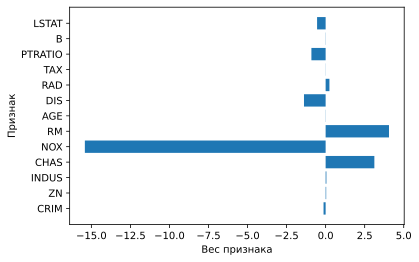

In [110]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [111]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [142]:
X_train_scaled = scaler.fit_transform(X_train)

In [143]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [144]:
X_test_scaled = scaler.fit_transform(X_test)

In [145]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Text(0, 0.5, 'Признак')

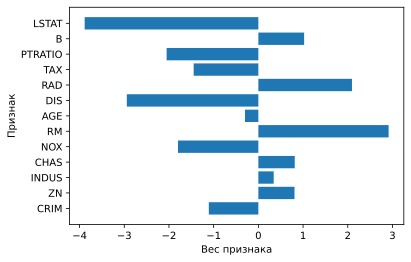

In [146]:
lr.fit(X_train_scaled, y_train)
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")

In [ ]:
Заданиу 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов
вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше

In [168]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [169]:
clf = RandomForestRegressor(n_estimators = 1000,max_depth = 12, random_state= 42)

In [170]:
clf.fit(X_train, y_train.values[:,0]) #обучение

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [184]:
y_pred = clf.predict(X_test) #предсказание
y_pred

array([22.80641237, 31.13146352, 16.33912494, 23.81072598, 17.13952074,
       21.8322837 , 19.89574701, 14.75411774, 21.2408346 , 20.89865761,
       20.2028696 , 19.95659298,  8.03651316, 21.51673023, 19.36048089,
       25.28222025, 18.82002442,  8.47636459, 45.9477    , 15.50141896,
       24.37448371, 23.98037718, 14.54950214, 23.57447941, 15.05119767,
       15.23703316, 21.59141811, 13.90617333, 19.67698308, 21.0552311 ,
       19.69950085, 23.2483229 , 29.99451024, 20.15961264, 14.39724675,
       16.02131035, 34.26043401, 19.19342625, 21.17764473, 24.22833434,
       18.60497   , 29.57765089, 45.5585    , 19.62038232, 22.575541  ,
       14.0331484 , 15.76855872, 24.50013129, 19.15469322, 28.28791716,
       21.35262285, 33.89102953, 17.67031122, 26.25583284, 45.51992393,
       21.89588357, 15.85210261, 32.38172361, 22.14020328, 20.61773671,
       25.39990971, 33.63617562, 30.10425708, 18.97044937, 27.14227131,
       16.90607   , 13.90610446, 23.10904339, 28.86343833, 15.57

In [177]:
y_pred_clf = clf.predict(X_test)
check_test_clf = pd.DataFrame({'y_test': y_test['price'],'y_pred_clf': y_pred_clf.flatten()},
                         columns = ['y_test', 'y_pred_clf'])
check_test_clf.head(10)

,y_test,y_pred_clf
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [191]:
from sklearn.metrics import mean_squared_error
mse_clf = mean_squared_error(check_test_clf["y_pred_clf"], check_test_clf["y_test"])
mse_clf

9.334548946165196

In [193]:
print(initial_mse, mse_clf)

21.517444231177 9.334548946165196


In [195]:
a = 21.517444231177/9.334548946165196
a

2.305140222122544

Случайный лес" показывает более точные результаты, чем "линейная регрессия" в 2.3 раза.

In [ ]:
*Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [188]:
clf.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [189]:
feature_importance = pd.DataFrame({'name':X.columns, 
                                   'feature_importance':clf.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.031676,CRIM
1,0.001543,ZN
2,0.007138,INDUS
3,0.001236,CHAS
4,0.014269,NOX
5,0.402682,RM
6,0.014299,AGE
7,0.063973,DIS
8,0.005281,RAD
9,0.011525,TAX


In [190]:
feature_importance.nlargest(2, 'feature_importance')

,feature_importance,name
12,0.415847,LSTAT
5,0.402682,RM


In [ ]:
Принаки LSTAT и RM обладают наибольшей важностью
